In [2]:
import datetime
import os
import glob
import gc
import pandas as pd
import xarray as xr
import numpy as np
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import colors

plt.style.use('science.mplstyle')
projectdir = '/glade/campaign/uwyo/wyom0112/berkeley/'

Figure 1
- demonstrate that the domains are in the western united states and show exactly where each domain is
- show that the resolutions are different and that the higher-resoution domains are nested within the lower-resolution domains
- show where and what size the huc 2 basins are, for intution later
- plot the topography, to show that the WUS has complext topography and that the higher-resolution domains contain some of the most complex topography

In [3]:
## fig 1 data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
huc2 = gpd.read_file(f'{projectdir}/fos-data/spatialdata/huc2.shp')
huc6 = gpd.read_file(f'{projectdir}/fos-data/spatialdata/huc6.shp')
metapath = '/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/'
coords1 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d01')
coords2 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d02')
coords4 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d04')
coords3 = xr.open_dataset('/glade/campaign/uwyo/wyom0112/postprocess/meta/meta_new/wrfinput_d03')
coords_dict = {'d01': coords1, 
               'd02': coords2,
               'd03': coords3,
               'd04': coords4}

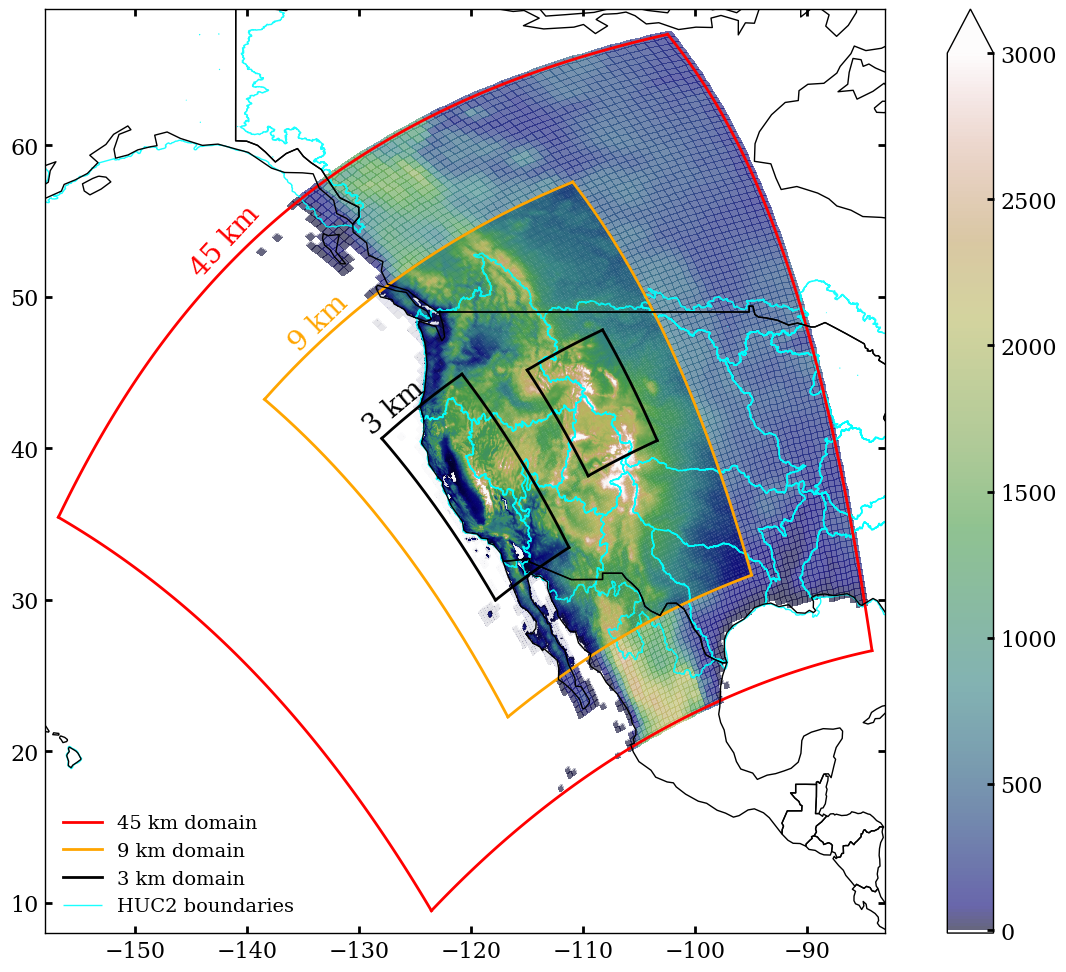

In [4]:
## fig 1 code
cmap = mpl.cm.gist_earth
new_cmap = cmap(np.arange(cmap.N))
vmin = -10
vmax = 3000
thresh = 10
thresh_idx = int((thresh - vmin) / (vmax - vmin) * cmap.N)
new_cmap[:thresh_idx, :] = 1.0  # RGB values for white
new_cmap = colors.ListedColormap(new_cmap)

clist = [[coords1, 'red',-145.5 ,51.4, '45 km', 47],
         [coords2, 'orange', -136.6 ,46.5, '9 km', 44],
         [coords3, 'black', -130 ,41, '3 km', 40],
         [coords4, 'black', -113 ,44.1, '  ', 40]]
fig,ax = plt.subplots(figsize=(16, 12))

for coords, color, lx, ly, l, rot in clist:
    cb = ax.pcolormesh(coords['XLONG'][0], coords['XLAT'][0], coords['HGT'][0], 
                  cmap =new_cmap, vmin = vmin, vmax = vmax, alpha = 0.6)
    ax.plot([0,1],[0,1], color = color, label = f'{l} domain')
    
    ax.plot(coords['XLONG'][0,:,0], coords['XLAT'][0,:,0], color =  color)
    ax.plot(coords['XLONG'][0,:,-1], coords['XLAT'][0,:,-1], color =  color)
    ax.plot(coords['XLONG'][0,0,:], coords['XLAT'][0,0,:], color = color)
    ax.plot(coords['XLONG'][0,-1,:], coords['XLAT'][0,-1,:], color = color)
    ax.text(lx,ly,l, color = color, fontsize = 20, zorder = 5, rotation = rot)

    
world.boundary.plot(ax=ax, linewidth =1 )
huc2.boundary.plot(ax=ax, linewidth = 1, label = 'HUC2 boundaries', color = 'cyan', alpha = 0.9, zorder = 1)

handles, labels = plt.gca().get_legend_handles_labels()

plt.colorbar(cb, extend  = 'max')    
indices = [0, 1, 2, 4] 
selected_handles = [handles[i] for i in indices]
selected_labels = [labels[i] for i in indices]
plt.legend(selected_handles, selected_labels, loc = 'lower left', 
           frameon = False)
ax.set_xlim((-158,-83))
ax.set_ylim((8,69))
plt.show()